In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 데이터 불러오기
df = pd.read_csv("C:/datasets/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# 칼럼 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


---

In [7]:
# 종속변수 → 문자형

df["Type_str"] = df["Type"].apply(str)
df.drop(columns=['Type'], axis=1, inplace=True) # 기존 Type은 필요없으니 drop
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_str
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# 종속변수 ↔ 독립변수
df_x = df[["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]]
df_y = df[["Type_str"]]

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.4, random_state=10)

print("train data 개수 : ", len(x_train))
print("test data 개수 : ", len(x_test))

train data 개수 :  128
test data 개수 :  86


---

## 의사결정나무

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
# 모델 생성 및 학습
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=5) # Entropy로 분류 & 노드의 층은 최대 5개
dt_model.fit(x_train, y_train)

# test
y_pred = dt_model.predict(x_test)

# Accuracy
accuracy_score(y_test, y_pred)

0.5581395348837209

---

In [35]:
# 독립변수 중요도 확인 → 합은 1

dt_model.feature_importances_

pd.DataFrame({'feature' : x_train.columns,
              'importance' : dt_model.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
2,Mg,0.320142
3,Al,0.210857
0,RI,0.147540
6,Ca,0.130653
4,Si,0.121046
1,Na,0.069763
5,K,0.000000
7,Ba,0.000000
8,Fe,0.000000


마그네슘(Mg), 알루미늄(Al)이 1,2순위임을 알 수 있다.

---

In [19]:
import pydotplus
from IPython.core.display import Image
from sklearn.tree import export_graphviz

In [24]:
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.44/bin/'

In [25]:
# 시각화 세부 옵션
dot_data = export_graphviz(dt_model,
                           out_file=None,
                           feature_names=x_train.columns,
                           class_names = dt_model.classes_,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# 시각화
dot_data
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

InvocationException: GraphViz's executables not found

---

## 랜덤포레스트

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [29]:
# 모델 생성 및 학습
rnf_model = RandomForestClassifier(n_estimators = 100,
                                   max_depth = 5,
                                   random_state = 0,
                                   bootstrap = True,
                                   class_weight = None,
                                   criterion = 'gini',
                                   max_features = 'auto',
                                   max_leaf_nodes = None,
                                   min_impurity_decrease = 0.0,
                                   min_samples_leaf = 1,
                                   min_samples_split = 2,
                                   min_weight_fraction_leaf = 0.0,
                                   n_jobs = None,
                                   oob_score = False,
                                   verbose = 0,
                                   warm_start = False)

rnf_model.fit(x_train, y_train)

# 예측
y_pred = rnf_model.predict(x_test)

# Accuracy
print(accuracy_score(y_test, y_pred))

0.7093023255813954


의사결정나무보다 더 높은 정확도

In [30]:
# 모델 성능 리포트
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.73      0.71        30
           2       0.62      0.77      0.69        26
           3       0.67      0.29      0.40         7
           5       1.00      0.75      0.86         8
           6       0.50      0.25      0.33         4
           7       0.91      0.91      0.91        11

    accuracy                           0.71        86
   macro avg       0.73      0.62      0.65        86
weighted avg       0.72      0.71      0.70        86



---

In [33]:
# 독립변수 중요도 파악

feature_imp = pd.Series(rnf_model.feature_importances_,
                        index = x_train.columns).sort_values(ascending=False)
feature_imp

Al    0.159236
Ca    0.153955
Mg    0.148816
RI    0.140340
Na    0.107937
Ba    0.090783
K     0.079957
Si    0.072258
Fe    0.046717
dtype: float64

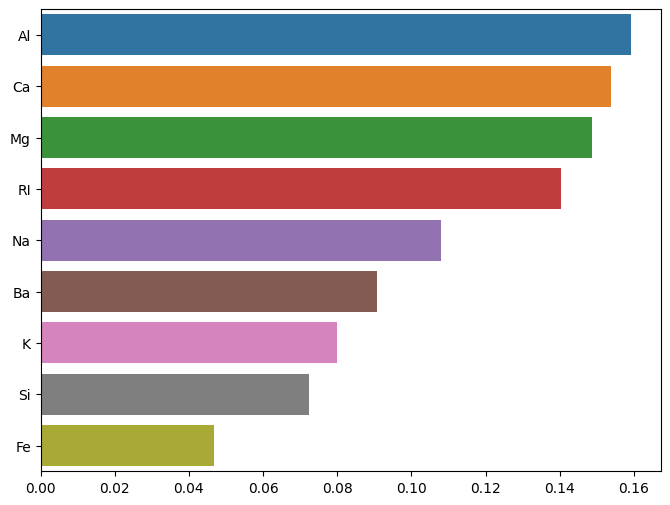

In [37]:
# 변수 중요도 시각화
plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

알루미늄(Al), 칼슘(Ca) 순으로 중요함  
또한, 앞서봤던 의사결정나무의 변수 중요도에 비해서 **고르게 분포**돼있음! (앙상블의 결과)